## Python ML Group - Week02. 선형회귀 (Linear regression)

반갑습니다. 이번 시간에는 선형회귀를 실습해보겠습니다.

실습 전에 앞으로 사용할 몇 가지 용어와 머신러닝에서 사용하는 개념들을 간단하게 설명하겠습니다.

### 지도 학습(supervised learning)

주어진 입력데이터 X  에 대해서 정확한 또는 알려진 출력 데이터(Y)가 있는 경우의 머신러닝을 지도 학습이라고 합니다.

수학에서의 함수와 같은 개념입니다. 

$ f(X) = Y $

입력데이터는 분석할 수 있도록 수치화되니 X 의 요소는 모두 숫자입니다.

출력데이터 Y 도 숫자입니다.   분류 문제를 다룰 때는 출력 데이터를 label 이라고 하는데, 숫자로 바꿉니다.

### 입력데이터 X

X 는 n 차원 벡터입니다.  n 개의 피쳐를 가지고 있다고도 말합니다.

X 에대 한 표현은 다음과 같습니다.

$ X = (x_1, x_2, ... , x_n) $

데이터 세트에서 위와 같은 데이터 X 가 m 개 있다면 각각을 구분하기 위해서 윗 첨자를 사용합니다.

첫 번쨰 데이터 :  $X^{1} = (x_1^1, x_2^1, ... , x_n^1) $

두 번쨰 데이터 :  $X^{2} = (x_1^2, x_2^2, ... , x_n^2) $

m 번째 데이터 : $X^{m} = (x_1^m, x_2^m, ... , x_n^m) $


전체 데이터 세트를 $m \times n$ 행렬로 나타낼 수 있습니다.

바이어스 항을 1을 포함해서 전체 데이터 세트를 나타내가도 합니다.

첫 번쨰 데이터 :  $X^{1} = (x_0^1, x_1^1, x_2^1, ... , x_n^1) $

두 번쨰 데이터 :  $X^{2} = (x_0^2, x_1^2, x_2^2, ... , x_n^2) $

m 번째 데이터 : $X^{m} = (x_0^m, x_1^m, x_2^m, ... , x_n^m) $

그러면 전체 데이터 세트를 $m \times n+1$ 행렬로 나타낼 수 있습니다.  $x_0^i = 1$ for every $i$

### 출력데이터 Y

예측하고자하는 Y 값이 실수 전체 집합인 경우에는 회귀라는 방법을 사용합니다. 

예측하고자하는 Y 값이 유한한 이산적인 수일 경우에는 분류 분제라고 합니다. 

분류 문제의 경우에는 보통 one-hot encoding 이라는 방법으로 Y 값을 행렬화합니다.

개와 고양이를 분류하는 경우에는  개는 [1, 0] 으로 고양이는 [0, 1] 로 Y 값을 정합니다.

### 가설(hypothesis)

가설이란 예측값(Y)을 계산하는 함수 f(X) 를 말합니다.  

가설 = 가설함수 = 예측함수 = 하이퍼쎄시스 = 모델   모두 같은 의미입니다.

머신러닝이란이 예측 오류가 작도록 가설함수를 정하는 과정입니다.

가설(함수)는 다음과 같이 정의합니다.  (함수기호로  f 대신 h 를 관례상 사용합니다.)

$ h_{W}(X) = bais \times x_0 + W_1 \times x_1 + W_2 \times x_2  + ... + W_n \times x_n$    
$(x_0 = 1)$ 

W 를 가중치라고 하는데 입력 데이터 X의 각각의 피쳐의 계수입니다.

머신러닝으로 훈련을 시킨다는 말은 bais 와 W 를 최적화한다는 말입니다.

가중치와 피처의 값을 곱한 결과가 예측값과 비례하기 떄문에 선형이란 용어를 사용합니다.

$y = 3 \times x$ 에서  y 와 x 는 비례관계, 즉 선형관계에 있습니다.

그러면 입력데이터의 피처들에 대해서 선형관계가 아닌 더 복잡한 곡선의 데이터를 예측해야하는 경우에는 어떻게 할 까요?

피처들을 서로 곱해서 더 복잡한 고차원의 피처를 만들어서 입력데이터로 사용합니다.

예를들어 입력데이터가 1차원인  X = [x]  라는 데이터가 주어졌지만 예측해야하는 결과는 3차원일 경우에 다음과 같이 가설 함수를 만들어 줍니다.


$h(x) = bias + W_1 x + W_2 x^2 + W_3 x^3$

실제 입력데이터의 피처는 1개 이지만 추가 피처를 만들어서 가설에 포함시켰습니다.

이 과정은 실제로 실습해보지 않으면 글자로만 이해하기 어려울 수도 있습니다.

###  실습 내용에 대해서...

이 실습은 일반 개발자 분들을 대상으로 하고 있기 때문에 머신러닝 이론을 파이썬 코딩으로 구현한 것을 실습하는 것 보다 파이썬 머신러닝 모듈을 그대로 사용해서 실습을 진행하겠습니다.

### 간단한 데이터 1

머신러닝을 공부할 때는 결과를 이미 정확히 알고 있는 간단한 모델과 데이터에서 출발하는 것이 좋습니다.


In [55]:
import numpy as np

X = np.array([1,2,3]).reshape(-1,1)
Y = np.array([1,2,3]).reshape(-1,1)

아주 단순한 선형관계를 갖는 데이터 이지만 그래프를 그려서 확인해보겠습니다.

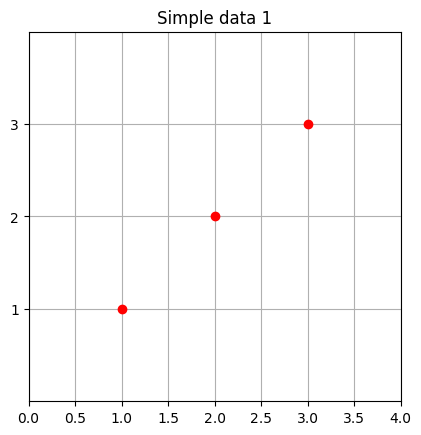

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('default')
fig, ax = plt.subplots(figsize=plt.figaspect(1))
ax.plot(X, Y, 'ro')
ax.set_xlim(np.min(X)-1, np.max(X)+1)
ax.set_ylim(np.min(Y)-1, np.max(Y)+1)
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.grid()
plt.title('Simple data 1')
plt.show()

위 데이터는 $y = 0 + x$  로 회귀할 수 있음을 할 수 있습니다.

이 데이터에서 나오는 결과값은 bias 는 0 이고 가충치 W 는 [1] 입니다.

앞으로 머신러닝에서 사용할 모듈은 사이킷런입니다.

선형회귀를 할 때는 사이킷런의 linear_model 모듈을 사용하거나 서포트벡터머신에서 선형커널을 골라서 사용합니다.

먼저 linear_model 에 있는 LinearRegression 인스턴스를 만드는 것 부터 시작합니다.

lr 은 linear regression 을 줄여서 표현한 변수명입니다.

In [57]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

머신러닝 클래스는 모두 fit 이라는 메쏘드에 입력 데이터를 넣어서 훈련시킵니다.

In [58]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

이것으로 머신러닝의 훈련과정은 끝났습니다.

훈련 결과로 나온 가중치 값과 바이어스 값을 확인해보겠습니다.

In [59]:
print('가중치 :', lr.coef_)
print('바이어스 ::', lr.intercept_)

가중치 : [[ 1.]]
바이어스 :: [  4.44089210e-16]


예상했던 결과인 가중치 [1] 과 바이어스 0 과 일치하는 결과를 얻었습니다.


훈결시킨 바이어스 값이 0이 되지 못한 이유는 머신러닝 모델에서 수식을 정밀하게 계산하는 것이 아니라 산술적인 방법과 루프로 계산하는 것이기 때문에 오차가 생깁니다.

입력값 X = [1,2,3] 에 대한 예측값을 훈련시킨 선형회귀 모델로 계산해보겠습니다.

In [60]:
lr.predict(X)

array([[ 1.],
       [ 2.],
       [ 3.]])

선형회귀에서는 오류 함수로 에측값과 실제값의 차이에 대한 제곱 평균을 사용합니다.

Mean square error 라고하는데 한 번 계산해보겠습니다.

In [61]:
from sklearn.metrics import mean_squared_error

mean_squared_error(lr.predict(X), Y)

8.2173010960522067e-32

데이터 세트와 선형회귀 결과를 같이 그래프로 그려보겠습니다.

시각화 함수를 정의해 두는 것이 앞으로의 실습에 도움이 되겠군요.

In [62]:
def plot_linear(X, Y, lr=None):
    width = np.max(X) - np.min(X)
    delta = width * 0.05
    xmin = np.min(X)-delta
    xmax = np.max(X)+delta
    fig, ax = plt.subplots(figsize=plt.figaspect(1))
    ax.plot(X, Y, 'ro')
    ax.set_xlim(xmin, xmax)
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.grid()
    if not lr is None:
        x_lin = np.linspace(xmin, xmax, 100).reshape(-1,1)
        lr.fit(X, Y)
        pred = lr.predict(x_lin)
        ax.plot(x_lin, pred, 'b-', lw=3, alpha=0.6)

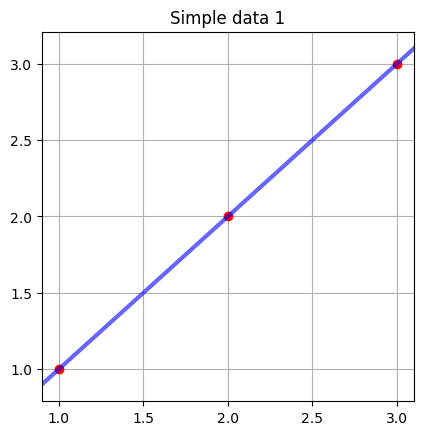

In [63]:
plot_linear(X, Y, lr=lr)
plt.title('Simple data 1')
plt.show()

### 간단한 데이터2

데이터 셋 X = [[1],[2],[3]], Y = [[1, [3], [3]]  에 대한 정확한 선형회귀의 결과는 
바이어스가 1/3 이고 가중치(이 경우에는 기울기)는 [[1]] 입니다.

확인해보겠습니다.

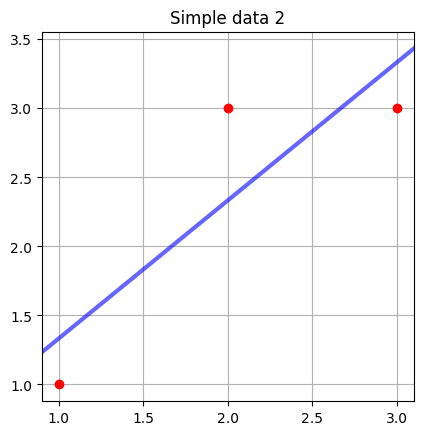

In [64]:
X = np.array([1,2,3]).reshape(-1,1)
Y = np.array([1,3,3]).reshape(-1,1)

lr = linear_model.LinearRegression()

plot_linear(X, Y, lr)
plt.title('Simple data 2')
plt.show()

In [65]:
print('가중치 :', lr.coef_)
print('바이어스 ::', lr.intercept_)

가중치 : [[ 1.]]
바이어스 :: [ 0.33333333]


### 실제 데이터 - 당뇨병 데이터

선형 회귀를 할려면 데이터가 필요합니다.

데이터는 텍스트 파일, CSV 파일, 엑셀 파일, 인터넷 소스, gzip 파일, mat 파일, pickle 파일, HDF5 파일 등과 같은 많은 소스로부터 얻어올 수 있습니다.  

당장은 조금 편한 방법으로 데이터를 얻어오는 방법을 선택하겠습니다.

그것은 파이썬 머신러닝 모듈 안에 연습용으로 들어있는 데이터를 사용하는 것입니다.

머신러닝 책을 읽어보셨다면,  분류 문제에서 아이리스(붓꽃) 종류 분류를 예시로드는 경우를 많이 볼 수 있습니다.
사이킷 런에는 그외에도 MNIST 에서얻을 수 있는 것과 비슷한 더 작은 손글씨 데이터세트도 들어있습니다.

이번에 사용할 데이터는 당뇨병에 관한 데이터입니다.

사실 데이터의 피쳐에 어떤 이름을 붙여도 머신러닝 과정에서는 숫자일 뿐입니다. 하지만 자신이 다루는 데이터에 대해서 꼼꼼히 살펴보보 시각화해보는 과정이 중요합니다.  어떤 인사이트를 얻을 수 있는지 데이터를 살펴보겠습니다.

[당뇨병 데이터에 대한 설명](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

[사이킷런 선형회귀 샘플 코드](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

데이터에 대한 설명은 다음과 같습니다.

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

X 값은 나이, 성명, BMI 수치, 혈압, 여섯 가지 혈액 성분 수치 이렇게 10 개의 피처를 가지고 있습니다.
Y 값은 1 년 후의 당뇨병 진행 상태를 수치화한 값입니다.

우선 데이터를 불러들여서 데이터 세트의 크기를 확인해보겠습니다.

In [66]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(type(diabetes))

<class 'sklearn.datasets.base.Bunch'>


In [67]:
X = diabetes.data

print(type(X), X.shape)

Y = diabetes.target
print(type(Y),Y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


사이킷런의 datasets 모듈에는 여러 종류의 연습용 데이터가 들어있습니다.

데이터를 불러운 후에 입력데이터 X 는  some_dataset.data 로 Y 데이터는  some_dataset.target 으로 불러옵니다.

당뇨병 데이터를 확인해보니 442개의 데이터가 있고 10개의 피쳐인 것을 확인할 수 있습니다.

X, Y 데이터 모두 numpy 배열이니 이대로 사용할 수 있습니다.

그런데 10개의 피쳐 중에서 당뇨병과 상관관계를 가질만한 피쳐가 어떤 것인지를 선택해야합니다.

당장은 변수가 한 개로만 선형회귀를 실습하겠습니다.

나이나 성별도 당뇨병과 상관관계가 있을 수도 있겠지만 선형관계는 아닐 것입니다.

데이터를 시각화해보고 선형회귀를 할 데이터를 골라보겠습니다.



In [68]:
def plot_all_features(X, Y, ncols=2, title=None):
    import matplotlib.ticker as ticker
    n = X.shape[1]
    nrows = int(np.ceil(n/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows), dpi=60) 
    plt.subplots_adjust(hspace=0.5)
    colors = [u'#348ABD', u'#A60628', u'#7A68A6', u'#467821', u'#D55E00',
              u'#CC79A7', u'#56B4E9', u'#009E73', u'#F0E442', u'#0072B2']
    for i in range(n):
        row, col = i // ncols, i % ncols
        ax = axes[row][col]
        ax.scatter(X[:,i], Y, color=colors[i % len(colors)], alpha=0.5)
        ax.set_ylabel('')
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        if not title is None:
            ax.set_title(title[i])
    plt.show()

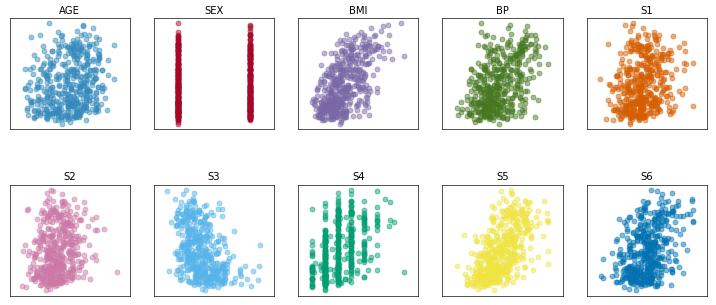

In [69]:
title = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5' ,'S6']
plot_all_features(X, Y, ncols=5, title=title)

데이터를 한 눈데 보니 BMI 가 당뇨병 지수와 가장 강한 양의 상관관계를 보이는 것 같습니다.

경우에 따라서 X 피쳐 간의 상관관계를 확인할 필요가 있습니다.

아래는 AGE, BMI, BP, Y(당뇨병 지수) 간의 그래프를 입니다.




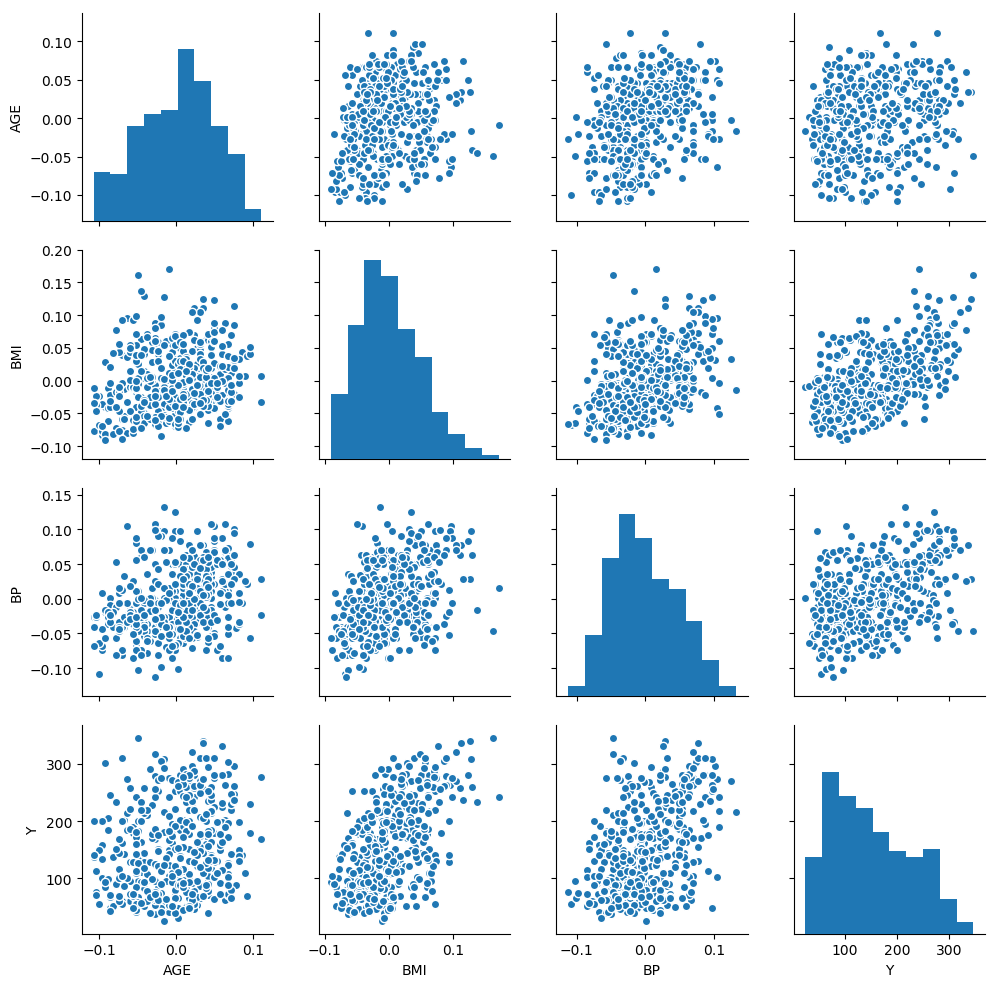

In [70]:
import seaborn as sns
import pandas as pd

XY = np.column_stack((X, Y))
df_diabetes = pd.DataFrame(XY, columns=title + ['Y'])
sns.pairplot(df_diabetes.iloc[:,[0,2,3,10]])
plt.show()

데이터에 대한 확인은 끝났으니 BMI 지수와 당뇨병 지수간의 선형회귀를 해보겠습니다.

### 당뇨병 데이터 선형회귀

In [71]:
bmi = X[:,2].reshape(-1,1) #  세 번쨰 컬럼이 BMI 지수 데이터 입니다.
print(bmi.shape)

lr = linear_model.LinearRegression()
lr.fit(bmi, Y)

print('가중치 :', lr.coef_)
print('바이어스 ::', lr.intercept_)

(442, 1)
가중치 : [ 949.43526038]
바이어스 :: 152.133484163


가중치(W) 와 바이어스를 구했는데, 이게 선형회귀 결과의 전부입니다.

결과를 도출하는 과정을 보면 데이터를 수지하고 분석해서 가공하는 과정이 훨씬 시간이 소모되고 실제 머신러닝 '훈련'과정은 간단하며 그 결과 또한 몇 개의 수치 배열로 리턴될 뿐입니다.

방금 얻은 선형회귀 결과로 그래프를 그려보겠습니다.


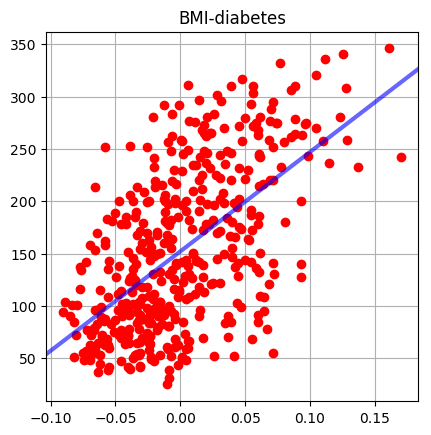

In [72]:
plt.style.use('default')
plot_linear(bmi, Y, lr)
plt.title('BMI-diabetes')
plt.show()

위 선형회귀 결과에 대한 제곱 합 에러도 계산해보겠습니다.

In [73]:
pred = lr.predict(bmi)
print('Square sum error:', mean_squared_error(pred, Y))

Square sum error: 3890.45658546


## 이번주 체크 포인트

#### 이해 포인트

- 선형회귀에 대한 이해. 왜 선형이라는 단어를 사용하는가?
- 선형회귀 알고리즘으로 비선형 결과를 예측할 수 있는가?
- 훈련데이터의 매트릭스를 이해하는가?  (m x n) 행렬의 입력데이터가 의미하는 것은?
- 선형관계가 인과관계를 나타내는 것은 아니다.


#### 실습 포인트

- 사이킷런의 datasets 모듈에서 데이터 가져오고, X, Y 데이터로 분류하기
- Y 데이터를 열벡터로 만들기  ((n, ) 형태를 (n, 1) 형태로 바꾸기)
- X 데이터의 한 피쳐를 선택해서 X-Y 그래프 그려보기(산포도 그래프)
- 사이킷런에서 선형회귀 모델을 불러와서 훈련시키기
- 훈련 결과 출력하기 ( 가중치, 바이어스, 오류값 )

#### 실전
- 사이킷 런의 datesets 에서 보스톤 집 가격 데이터로 선형회귀 실습해보기
- 여러가지 피쳐 중에서 집 가격과 상관도가 높은 두 개의 피쳐를 골라서 각각 선형회귀한 결과를 비교해보기

## 보스톤 집 가격 데이터

boston = sklearn.datasets.load_boston()

#### 피쳐

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population


#### 참고 사이트
[Neural Thoughts](http://www.neural.cz/dataset-exploration-boston-house-pricing.html)

[데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/4b948c4d99c94213bf02bcff2ced88eb/)